In [ ]:
# ..... plot pseudobulk expr across 3 species ..... #

In [3]:
library(dplyr)
library(ggplot2)
library(MetaNeighbor)

In [5]:
# specificity calculation
calc_spec <- function (res){    
    
    mini = 1    
    
    temp1 = t(apply(res, 1, function(x) rank(x, ties.method = "average")))  
    range1 = dim(res)[2] - 1
    spec1 <- (temp1 - mini)/range1   
                    
    temp2 = t(apply(t(res), 1, function(x) rank(x, ties.method = "average")))  
    range2 = dim(res)[1] - 1
    spec2 <- (temp2 - mini)/range2
                    
    spec = 0.5*(spec1 + t(spec2))
    
    return(spec) # return full matrix
}  

In [6]:
# dev gene list
tab1 = read.delim('cardoso_moreira_dev_S2.txt', sep = '\t')
dim(tab1)
tab1[1:2,]

[1] 33990    26

Human.ID        Gene.symbol WGNA.module Disease Number.systems System
1 ENSG00000000003 TSPAN6      M23         Not_DM  NA             NA    
2 ENSG00000000005 TNMD        M21         Not_DM  NA             NA    
  Number.of.organs.with.dynamic.expression Organ.specificity
1 4                                        0.08661762       
2 2                                        0.73421856       
  Organ.of..maximum.expression Brain.time.specificity ⋯ median.time.specificity
1 Kidney                       0.4578233              ⋯ 0.1360614              
2 Testis                              NA              ⋯ 0.8932163              
  Expression.pleiotropy Brain.clusters Cerebellum.clusters Heart.clusters
1 1.0000000              1              5                  2             
2 0.1641791             NA             NA                  5             
  Kidney.clusters Liver.clusters Ovary.clusters Testis.clusters
1 NA              NA              2             NA             
2 NA              NA             NA              2             
  WGCNA.module.color
1 royalblue         
2 purple

In [7]:
# load data
load('chicken/chicken_full_integrated_pseudobulk_expression_matrix.Rdata')
mat1 = dfnew
load('turtle/turtle_full_integrated_pseudobulk_expression_matrix.Rdata')
mat2 = dfnew
load('lizard/lizard_full_integrated_pseudobulk_expression_matrix.Rdata')
mat3 = dfnew

In [8]:
mat1[1:4,]

s1|LV_vCM  s1|RV_vCM  s1|aCM     s1|immature_CM s1|endocardial
SPRY2   32.781317  29.180914  33.757979  48.96076       57.05561     
PCDH20   2.915831   1.372974   5.015854  13.10316       19.28195     
NDFIP2 222.018155 212.026673 235.920505 208.16461      288.30428     
RBM26  316.856486 309.379349 322.481704 237.61576      317.89044     
       s1|epicardial s1|mes_progenitor s1|fibroblast s1|SMC     s1|neural_crest
SPRY2  105.6055       37.119764         30.374392      8.461382 0              
PCDH20   0.0000        1.554232          1.719076      0.000000 0              
NDFIP2 200.2750      218.314919        201.102922    210.050891 0              
RBM26  340.4799      314.993595        338.462716    292.338141 0              
       ⋯ s3|aCM     s3|immature_CM s3|endocardial s3|epicardial
SPRY2  ⋯  16.825357  48.52239       90.19427       92.589578   
PCDH20 ⋯   1.661596   0.00000       15.70153        1.984512   
NDFIP2 ⋯ 215.340335 114.30029      308.47652      249.254336   
RBM26  ⋯ 307.282544 175.82498      318.39309      329.256134   
       s3|mes_progenitor s3|fibroblast s3|SMC     s3|neural_crest s3|blood  
SPRY2   35.697257        173.631811     17.232327  64.22674        17.288173
PCDH20   2.209798          1.321577      1.942549   2.05738         2.295825
NDFIP2 210.015594        235.405762    205.389106 175.24013       102.296474
RBM26  298.951905        329.474769    356.775219 281.61314       396.185601
       s3|macrophage
SPRY2   11.217805   
PCDH20   4.960121   
NDFIP2 372.953272   
RBM26  425.097139

In [9]:
# pairwise correlations
c1 = cor(t(mat1), t(mat2), method = 'spearman')
c2 = cor(t(mat1), t(mat3), method = 'spearman')
c3 = cor(t(mat2), t(mat3), method = 'spearman')

Warning message in cor(t(mat1), t(mat2), method = "spearman"):
“the standard deviation is zero”
Warning message in cor(t(mat1), t(mat3), method = "spearman"):
“the standard deviation is zero”
Warning message in cor(t(mat2), t(mat3), method = "spearman"):
“the standard deviation is zero”


In [18]:
# specificity scores
f1 = calc_spec(c1)
max(f1, na.rm = T)
min(f1, na.rm = T)

[1] 1

[1] 0

In [11]:
om1 = read.delim('chicken/human_chicken_orthologs_biomart.txt', sep = '\t')
om2 = read.delim('turtle/human_turtle_orthologs_biomart.txt', sep = '\t')
om3 = read.delim('lizard/lizard_human_orthologs_eggNOG.txt', sep = '\t')

om1 <- om1[om1[,4]=='ortholog_one2one',]
om2 <- om2[om2[,4]=='ortholog_one2one',]
om3 <- om3[om3[,2]=='one2one',]

om1[1,]
om2[1,]
om3[2,]

Gene.name Chicken.gene.name Last.common.ancestor.with.Chicken
6 MT-ND1    ND1               Amniota                          
  Chicken.homology.type
6 ortholog_one2one

Gene.name Painted.turtle.gene.name Last.common.ancestor.with.Painted.turtle
11 MT-ND2    ND2                      Vertebrata                              
   Painted.turtle.homology.type
11 ortholog_one2one            
   Painted.turtle.orthology.confidence..0.low..1.high.
11 1

query          orth_type species            orthologs       lizard_gene
2 XP_060608689.1 one2one   Homo sapiens(9606) ENSP00000340297 ARHGEF10   
  ortholog_gene   ortholog_name
2 ENSG00000104728 ARHGEF10

In [12]:
# add 1-1 orthologs across species
tab1$chicken_gene = om1[match(tab1$Gene.symbol, om1[,1]),2]
tab1$turtle_gene = om2[match(tab1$Gene.symbol, om2[,1]),2]
tab1$lizard_gene = om3$lizard_gene[match(tab1$Gene.symbol, om3$ortholog_name)]

In [19]:
# get pairwise expressolog scores?
id1 = match(tab1$chicken_gene, rownames(f1))
id2 = match(tab1$turtle_gene, colnames(f1))

In [20]:
tab1$chicken_turtle = unlist(lapply(1:length(id1), function(ii) f1[id1[ii], id2[ii]]))

In [21]:
table(tab1$System)


             Blood             Cancer      Developmental    Developmental++ 
                67                 74                117               1698 
         Digestive  Ear Nose & Throat          Endocrine                Eye 
                21                 70                 18                180 
     Genitourinary              Heart             Immune          Metabolic 
                38                101                 59                176 
   MultipleSystems    Musculoskeletal     Nervous system NervousPsychiatric 
               783                 57                277                 23 
       Psychiatric       Reproductive        Respiratory               Skin 
                26                 18                  8                 22 

In [22]:
tab1$avg_expressolog = rowMeans(tab1[,30:32], na.rm = T)

In [23]:
tab1[1:2,]

Human.ID        Gene.symbol WGNA.module Disease Number.systems System
1 ENSG00000000003 TSPAN6      M23         Not_DM  NA             NA    
2 ENSG00000000005 TNMD        M21         Not_DM  NA             NA    
  Number.of.organs.with.dynamic.expression Organ.specificity
1 4                                        0.08661762       
2 2                                        0.73421856       
  Organ.of..maximum.expression Brain.time.specificity ⋯ Ovary.clusters
1 Kidney                       0.4578233              ⋯  2            
2 Testis                              NA              ⋯ NA            
  Testis.clusters WGCNA.module.color chicken_gene turtle_gene lizard_gene
1 NA              royalblue          TSPAN6       TSPAN6      TSPAN6     
2  2              purple             TNMD         TNMD        TNMD       
  turtle_lizard chicken_lizard chicken_turtle avg_expressolog
1 0.7796995     0.9053606      0.9245937      0.8698846      
2 0.8156884     0.3921173      0.1655992      0.4578016

In [38]:
tab2 = tab1[!is.na(tab1$Disease),]


ggplot(tab2, aes(Disease, avg_expressolog)) + geom_boxplot() + theme_bw() +
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
ylab('cross-species coexpression')

Warning message:
“Removed 7490 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [39]:
tab1$Disease2 = 'Non_disease'
tab1$Disease2[!is.na(tab1$System)] = 'Other_disease'
tab1$Disease2[!is.na(tab1$System) & tab1$System=='Heart'] = 'Heart'

tab1$Disease2[!is.na(tab1$System) & tab1$System %in% c('Developmental', 'Developmental++')] = 'Developmental'

Warning message:
“Removed 21122 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


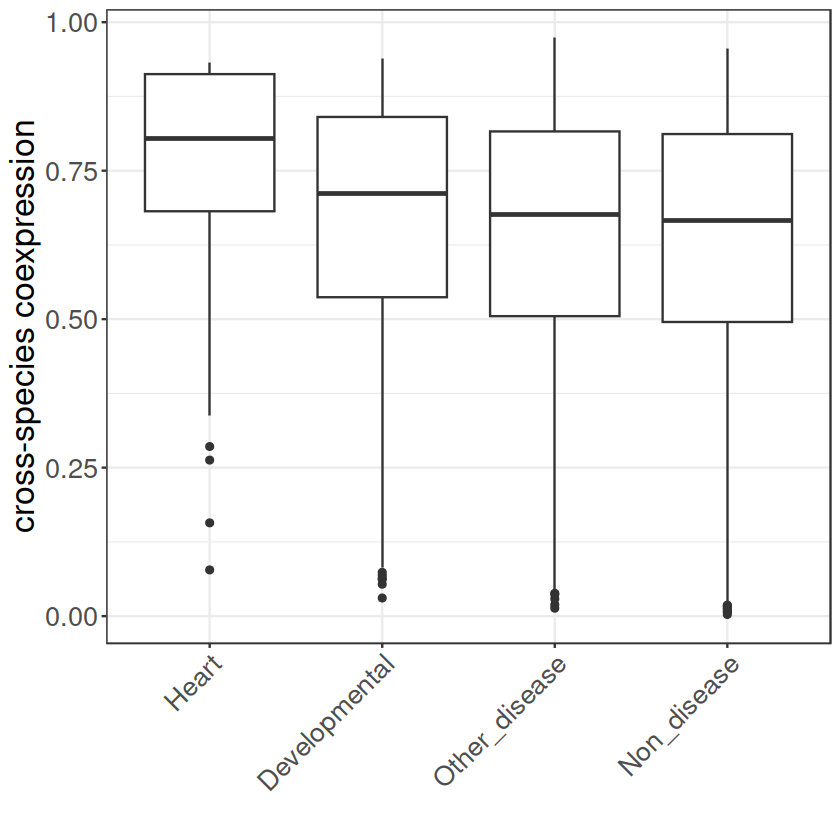

In [40]:
tab2 = tab1[!is.na(tab1$Disease2),]
tab2$Disease2 = factor(tab2$Disease2, levels = c('Heart', 'Developmental', 'Other_disease', 'Non_disease'))
ggplot(tab2, aes(Disease2, avg_expressolog)) + geom_boxplot() + theme_bw() +
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
ylab('cross-species coexpression') + xlab('')

Warning message:
“Removed 21122 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


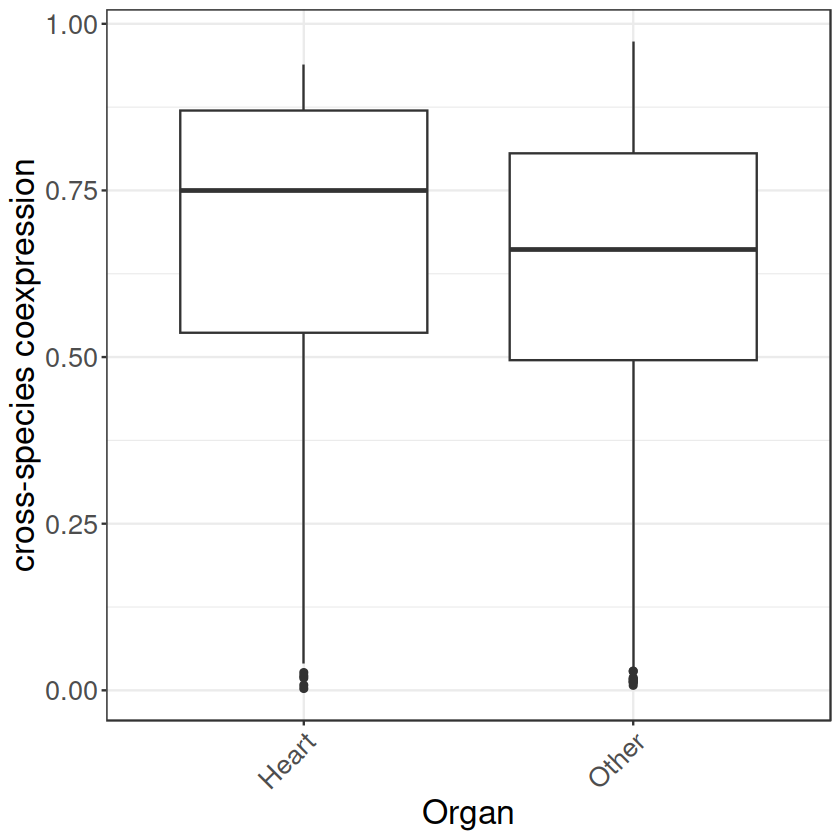

In [42]:
tab1$Organ2 = 'Other'
tab1$Organ2[!is.na(tab1$Organ.of..maximum.expression) & tab1$Organ.of..maximum.expression=='Heart'] = 'Heart'

tab2 = tab1[!is.na(tab1$Organ2),]
tab2$Organ2 = factor(tab2$Organ2, levels = c('Heart', 'Other'))
ggplot(tab2, aes(Organ2, avg_expressolog)) + geom_boxplot() + theme_bw() +
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
ylab('cross-species coexpression') + xlab('Organ')

In [43]:
tab2 = tab1
tab2 <- tab2[!is.na(tab2$Heart.time.specificity),]
tab2$tile1 = ntile(tab2$Heart.time.specificity, 4)

In [45]:
ggplot(tab2, aes(as.factor(tile1), avg_expressolog)) + geom_boxplot() +
# geom_point() + geom_smooth(method = 'lm') +
theme_bw() + theme(text = element_text(size = 20)) + xlab('Heart time specificity') +
ylab('cross-species coexpression')

Warning message:
“Removed 3336 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [30]:
# save
write.table(tab1, file = 'cardoso_moreira_S2_expressolog.txt', sep = '\t', row.names = F,
           col.names = T, quote = F)

In [1]:
tab1 = read.delim('cardoso_moreira_S2_expressolog.txt', sep = '\t')

In [4]:
tab3 = read.delim('heart_DDGs.csv', sep = ',')
dim(tab3)
tab3[1,]

[1] 1871   10

Human_ID        Mouse_ID           Rat_ID             Rabbit_ID         
1 ENSG00000001084 ENSMUSG00000032350 ENSRNOG00000006302 ENSOCUG00000012805
  Opossum_ID         comparison prob_same   on_branch classification X 
1 ENSMODG00000018800 MR_Rab     0.001924205 Rab       Rabbit         NA

In [5]:
table(tab3$classification)


    Conserved Eutherian/opo        Glires         Human        M_R_NA 
         1455           108            18            59            13 
        Mouse     MR_Rab_NA    MRRab_H_NA        Rabbit           Rat 
           47            16            26            47            44 
      Rodents 
           38 

In [6]:
tab3$classification[tab3$classification=='M_R_NA'] = 'Rodents'
tab3$classification[tab3$classification=='MR_Rab_NA'] = 'Glires'
tab3$classification[tab3$classification=='MRRab_H_NA'] = 'Eutherian/opo'
tab3$classification[tab3$classification %in% c('Human', 'Rat', 'Rabbit', 'Mouse')] = 'species_specific'

In [7]:
table(tab3$classification)


       Conserved    Eutherian/opo           Glires          Rodents 
            1455              134               34               51 
species_specific 
             197 

In [10]:
tab3$classification2 = tab3$classification
tab3$classification2[tab3$classification!='Conserved' & !is.na(tab3$classification)] = 'species_specific'

In [9]:
tab3$avg_expressolog = tab1$avg_expressolog[match(tab3$Human_ID, tab1$Human.ID)]

In [11]:
tab2 = tab3[!is.na(tab3$classification2),]
# tab2$classification = factor(tab2$classification, levels = c('Conserved', 'Eutherian/opo', 'Glires', 'Rodents', 'species_specific'))

ggplot(tab2, aes(classification2, avg_expressolog)) + geom_boxplot() + theme_bw() +
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
ylab('cross-species coexpression') + xlab('')

Warning message:
“Removed 219 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
